In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('data/kickstarter_projects.csv')
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [3]:
# Convert columns to lowercase
df.columns = df.columns.str.lower()

# Drop 'ID' and 'Name' columns
df = df.drop(columns=['id', 'name'])
df.columns

Index(['category', 'subcategory', 'country', 'launched', 'deadline', 'goal',
       'pledged', 'backers', 'state'],
      dtype='object')

In [4]:
# Print correlation of variables
df[['category', 'subcategory', 'country', 'goal']].corr()

ValueError: could not convert string to float: 'Fashion'

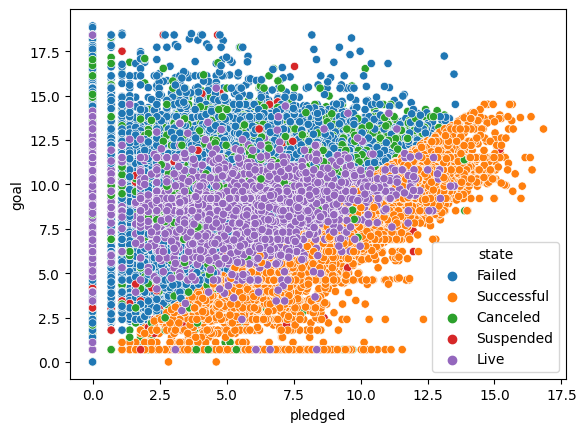

In [14]:
# Plot relationship between goal and pledged
sns.scatterplot(x="pledged", y="goal", data=df, hue='state')
plt.show()

In [ ]:
df.describe()

In [8]:
# Apply logarithmic transformation to 'pledged' and 'goal' columns
df['pledged'] = np.log1p(df['pledged'])  # log1p is used to handle zero values
df['goal'] = np.log1p(df['goal'])

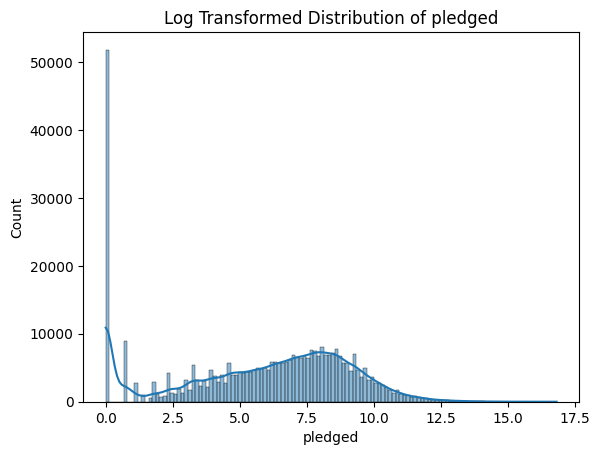

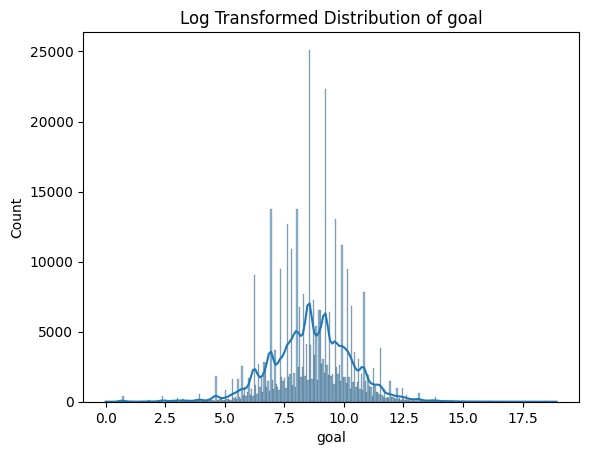

In [13]:
# Examine distributions after log transformation
for col in ['pledged', 'goal']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Log Transformed Distribution of {col}')
    plt.show()

In [9]:
# Define feature and target variable
X = df[['goal']]
y = df['pledged']

X.shape

(374853, 1)

In [10]:
# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Calculate r-squared 
y_hat = lin_reg.predict(X)
print("R-squared:", r2_score(y, y_hat).round(3))

R-squared: 0.019


Text(0.5, 0, 'goal')

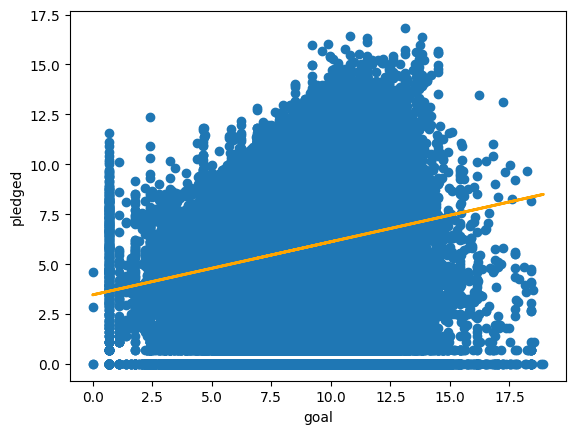

In [11]:
# Plot data with regression line
plt.scatter(X, y)
plt.plot(X, y_hat, '-', color='orange', linewidth=2)
plt.ylabel('pledged')
plt.xlabel('goal')